In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm


import seaborn as sns

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv', skiprows=4)
raw = raw.truncate(after=347)

In [3]:
raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
raw.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
df = pd.DataFrame(raw[['City', 'Population']])

df['Population'] = df['Population'].apply(lambda x: int(x.replace(',','')))
df['ViolentCrime'] = raw['Violent\ncrime']
df['Murder'] = raw['Murder and\nnonnegligent\nmanslaughter']
df['Rape'] = raw['Rape\n(legacy\ndefinition)2']
df['Robbery'] = raw['Robbery']
df['AggravatedAssault'] = raw['Aggravated\nassault']
df['PropertyCrime'] = raw['Property\ncrime']
df['Burglary'] = raw['Burglary']
df['Larceny'] = raw['Larceny-\ntheft']
df['CarTheft'] = raw['Motor\nvehicle\ntheft']
df['Arson'] = raw['Arson3'].fillna(0)

In [6]:
df['ViolentCrime'] = df['ViolentCrime'].apply(lambda x: float(str(x).replace(',','')))
df['Murder'] = df['Murder'].apply(lambda x: float(str(x).replace(',','')))
df['Rape'] = df['Rape'].apply(lambda x: float(str(x).replace(',','')))
df['Robbery'] = df['Robbery'].apply(lambda x: float(str(x).replace(',','')))
df['AggravatedAssault'] = df['AggravatedAssault'].apply(lambda x: float(str(x).replace(',','')))
df['PropertyCrime'] = df['PropertyCrime'].apply(lambda x: float(str(x).replace(',','')))
df['Burglary'] = df['Burglary'].apply(lambda x: float(str(x).replace(',','')))
df['Larceny'] = df['Larceny'].apply(lambda x: float(str(x).replace(',','')))
df['CarTheft'] = df['CarTheft'].apply(lambda x: float(str(x).replace(',','')))
df['Arson'] = df['Arson'].apply(lambda x: float(str(x).replace(',','')))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
City                 348 non-null object
Population           348 non-null int64
ViolentCrime         348 non-null float64
Murder               348 non-null float64
Rape                 348 non-null float64
Robbery              348 non-null float64
AggravatedAssault    348 non-null float64
PropertyCrime        348 non-null float64
Burglary             348 non-null float64
Larceny              348 non-null float64
CarTheft             348 non-null float64
Arson                348 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 32.7+ KB


In [8]:
df.describe()

,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft,Arson
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.005747
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,7.884612
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,0.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [9]:
df.head()

,City,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft,Arson
0,Adams Village,1861,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,0.0
4,Albion Village,6388,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0


In [10]:
features = pd.DataFrame(df.drop('City', axis=1))

In [11]:
features = features[features['Population'] < 20000]

In [12]:
def tobinary(x):
    if x > 0:
        return 1
    else:
        return 0

In [13]:
features['Robbery'] = features['Robbery'].apply(lambda x: tobinary(x))

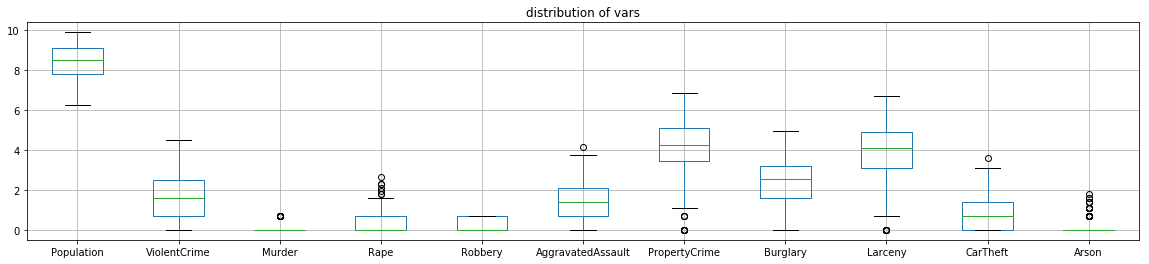

In [14]:
data = np.log(features+1)

data.plot(subplots=False, kind='box', layout=(3,4),
                   title='distribution of vars', grid=True)

plt.subplots_adjust(right=2.7)
plt.show()


In [15]:
features['Robbery'].value_counts()

0    137
1    132
Name: Robbery, dtype: int64

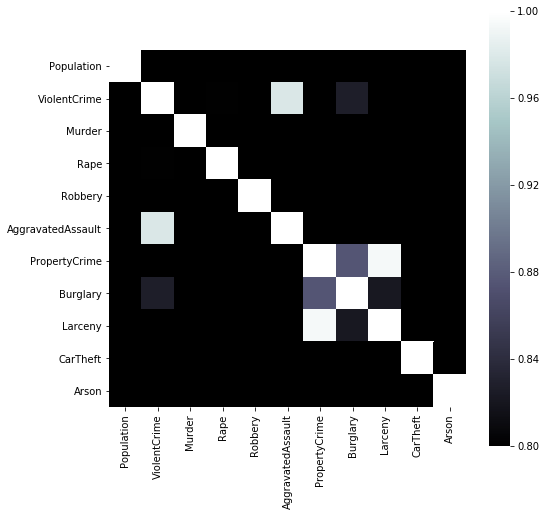

In [16]:
plt.rcParams['figure.figsize'] = 8, 8

sns.heatmap(features.corr(), vmin=.8, square=True, cmap='bone')

In [17]:
logreg = LogisticRegression(C=10000)

In [18]:
X = features.drop(['Robbery', 'ViolentCrime', 'PropertyCrime'], axis=1)
Y = features['Robbery']

In [19]:
lrfit = logreg.fit(X, Y)

In [20]:
print(lrfit.coef_)
print(lrfit.intercept_)

print(pd.crosstab(logreg.predict(X), Y))
print(cross_val_score(logreg, X, Y, cv=5))

[[ -4.13592523e-05   2.51394372e-01  -6.18712479e-02  -1.88579412e-02
    1.83568976e-02   2.54559991e-02   2.36829283e-01   5.94556483e-02]]
[-2.28213855]
Robbery    0   1
row_0           
0        120  35
1         17  97
[ 0.74545455  0.81818182  0.75471698  0.83018868  0.75471698]


In [21]:
features2 = pd.DataFrame(features)

In [22]:
for column in features2.columns:
    if column != 'Robbery':
        features[column] = np.log(features[column]+1)

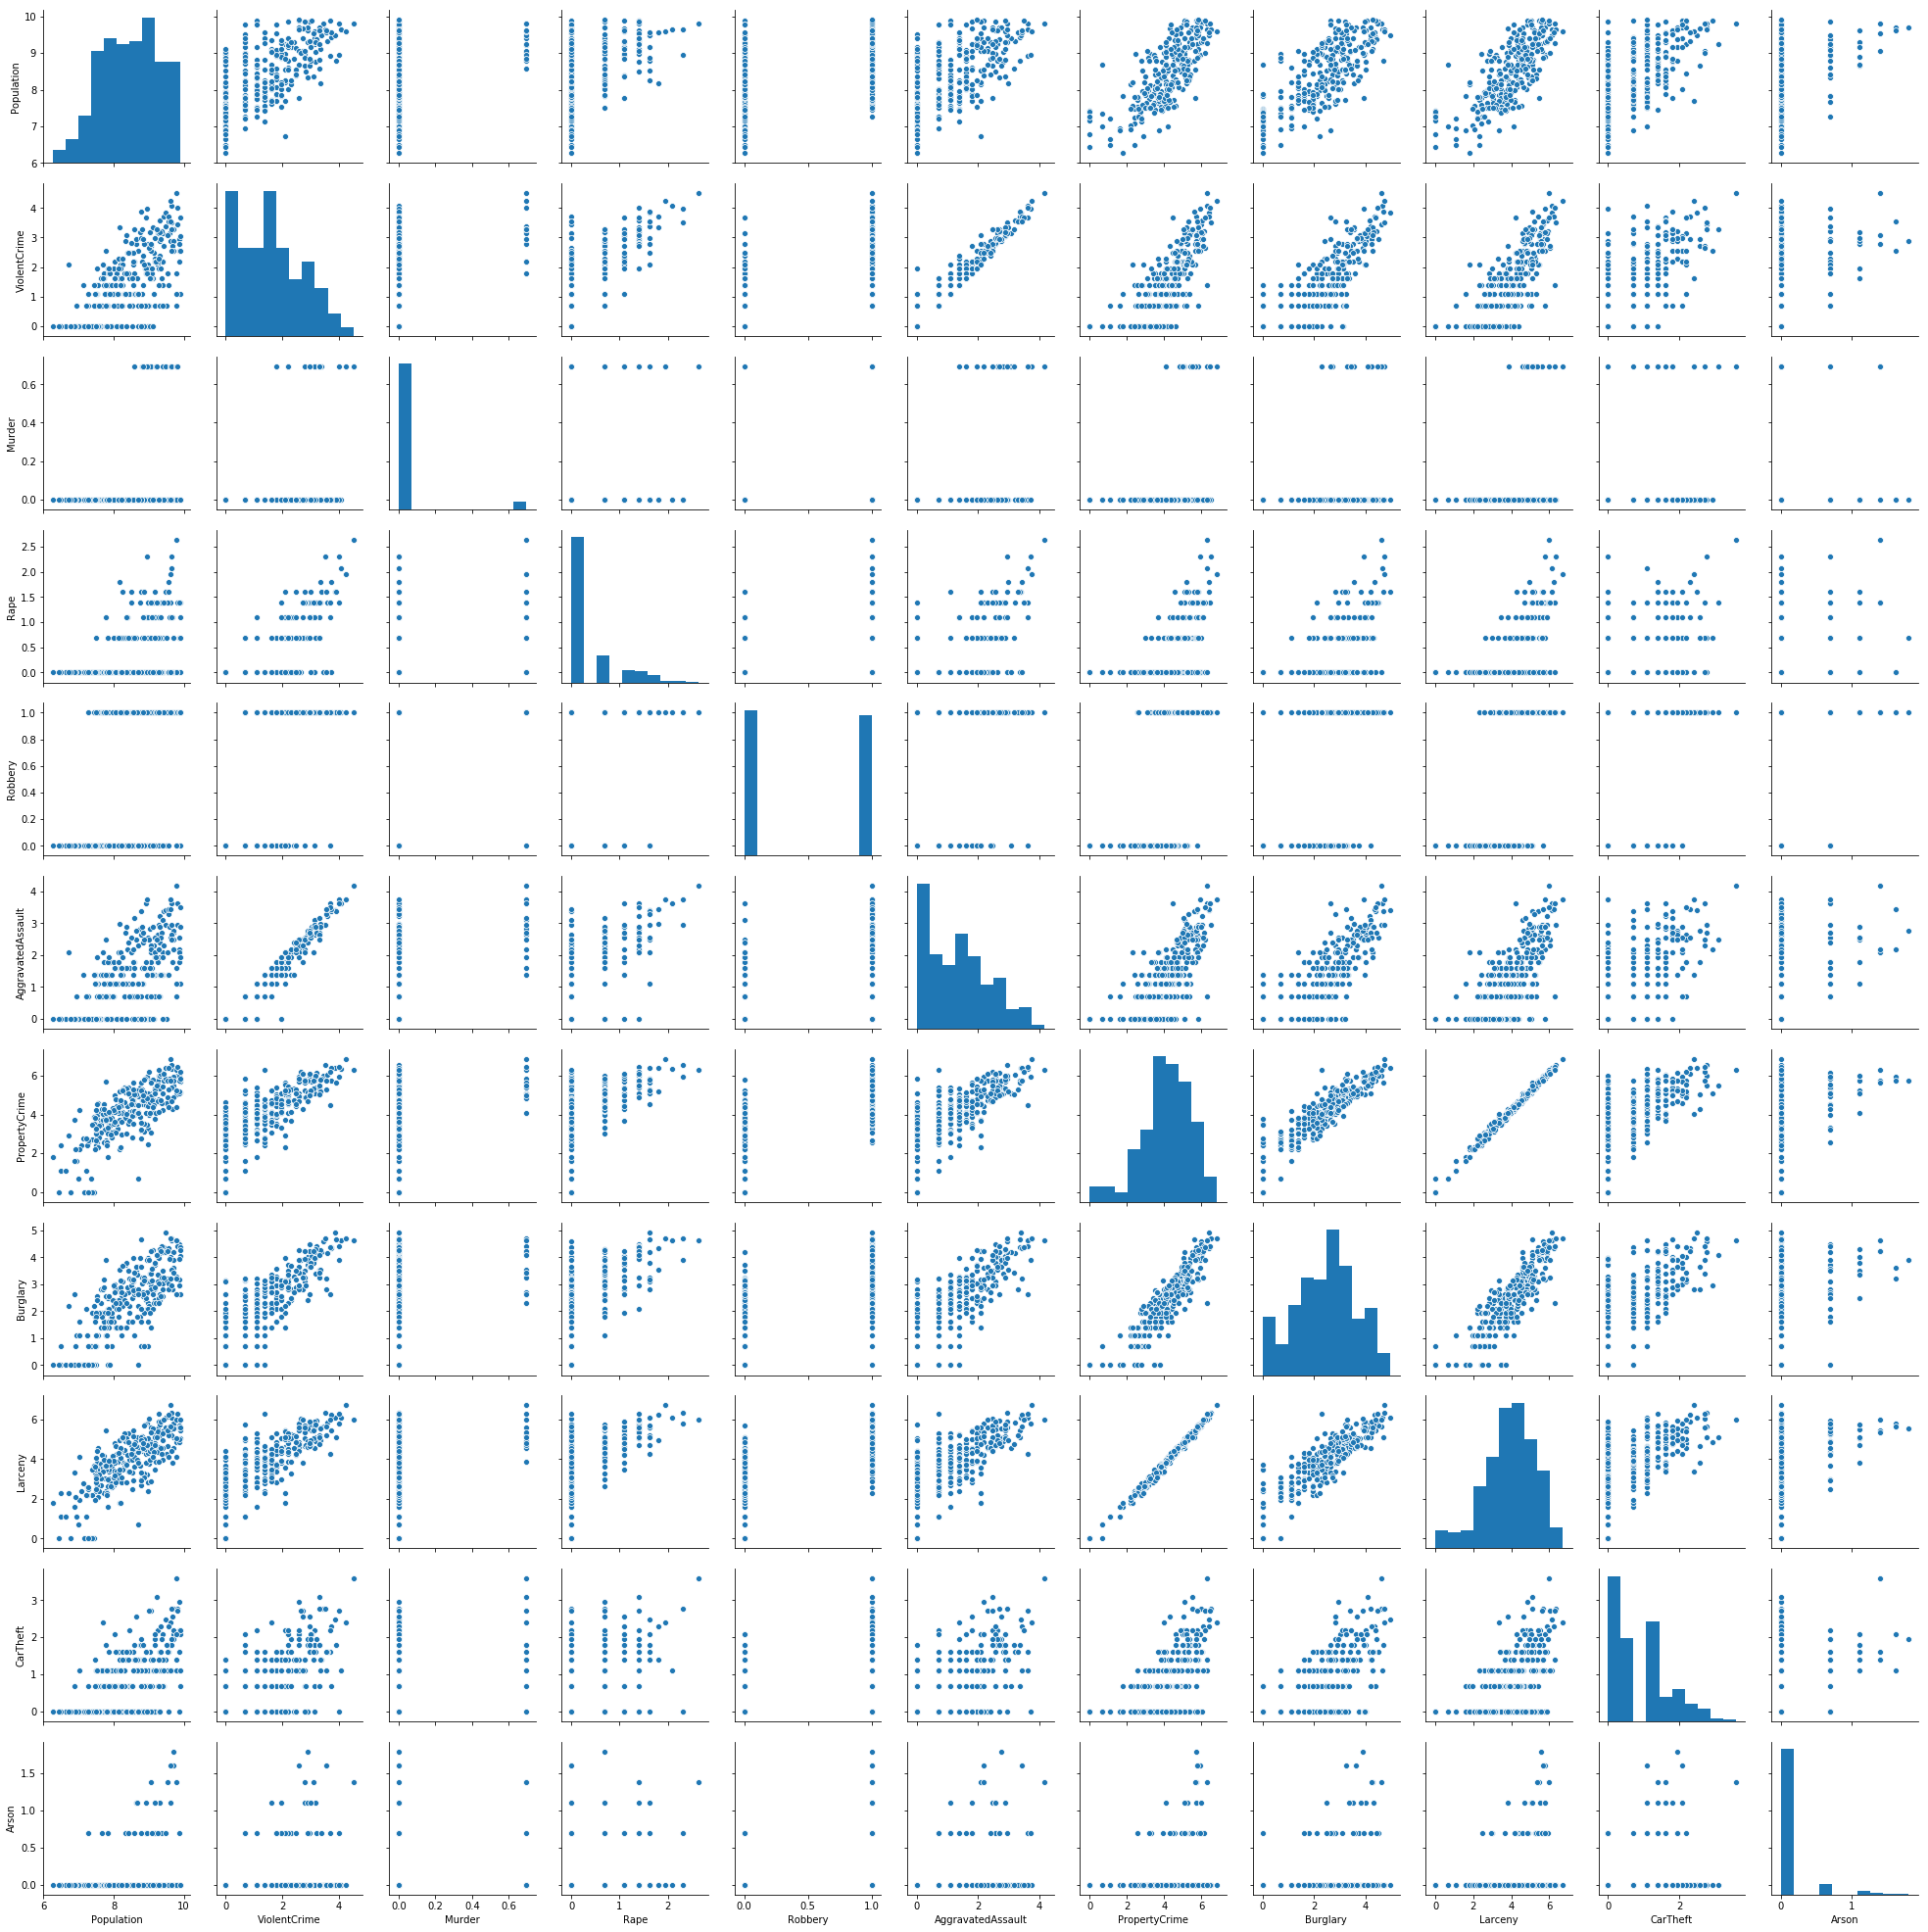

In [23]:
sns.pairplot(features2)

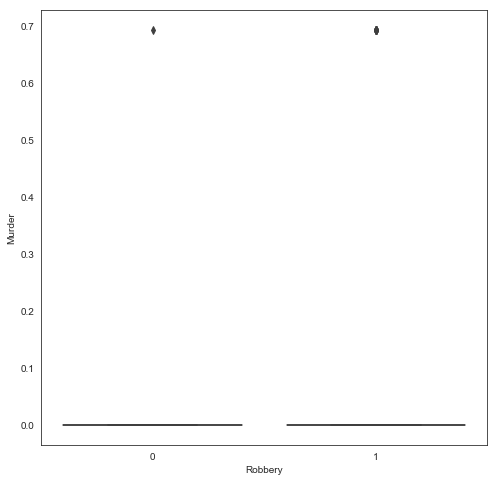

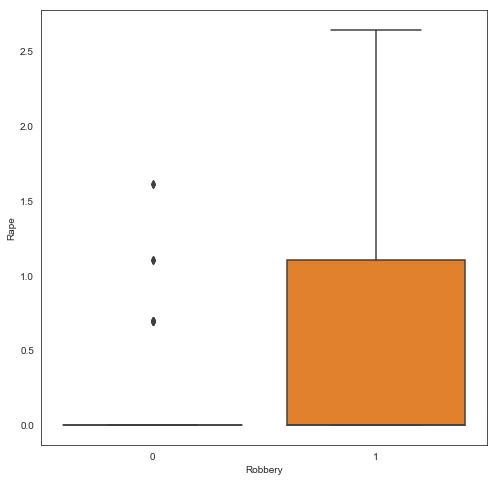

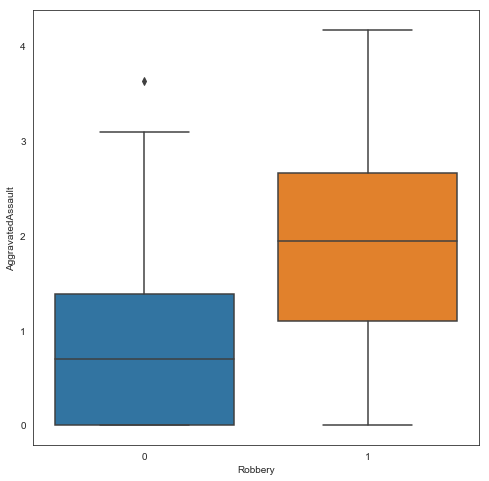

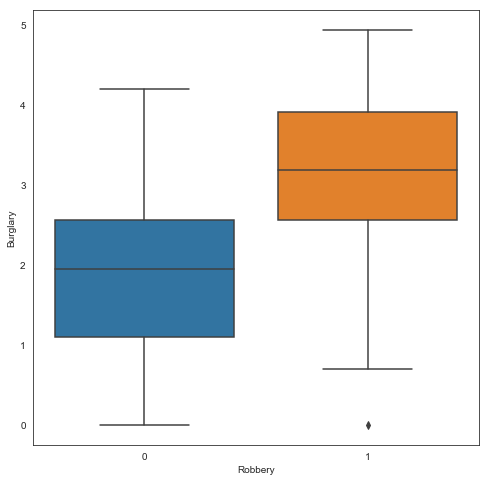

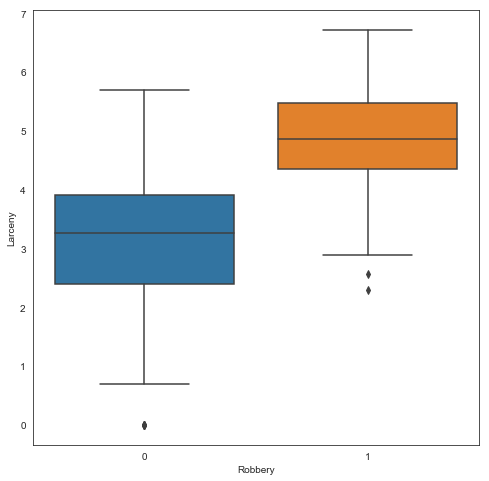

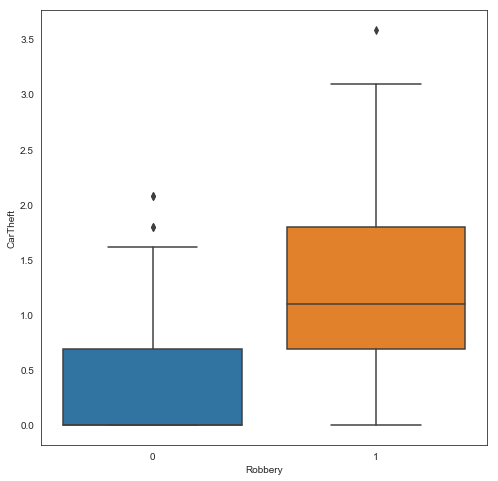

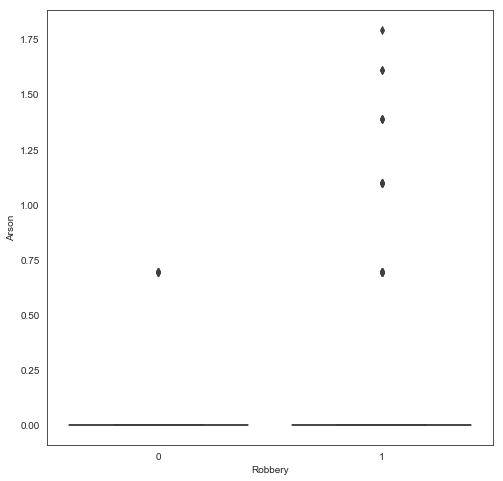

In [24]:
sns.set_style("white")

sns.boxplot(x="Robbery", y="Murder", data=features2)
plt.show()
sns.boxplot(x="Robbery", y="Rape", data=features2)
plt.show()
sns.boxplot(x="Robbery", y="AggravatedAssault", data=features2)
plt.show()
sns.boxplot(x="Robbery", y="Burglary", data=features2)
plt.show()
sns.boxplot(x="Robbery", y="Larceny", data=features2)
plt.show()
sns.boxplot(x="Robbery", y="CarTheft", data=features2)
plt.show()
sns.boxplot(x="Robbery", y="Arson", data=features2)
plt.show()


# "Vanilla" Logistic Regression

## Statsmodels

In [25]:
X_statsmod = features2.drop(['Robbery', 'ViolentCrime',
                             'PropertyCrime', 'Murder', 'Arson'], axis=1)
Y_statsmod = features2['Robbery']

In [26]:
logit = sm.Logit(Y_statsmod, X_statsmod)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.413061
         Iterations 7


In [27]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Robbery   No. Observations:                  269
Model:                          Logit   Df Residuals:                      263
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:                  0.4039
Time:                        15:44:53   Log-Likelihood:                -111.11
converged:                       True   LL-Null:                       -186.41
                                        LLR p-value:                 9.983e-31
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Population           -0.9538      0.142     -6.737      0.000      -1.231      -0.676
Rape                  0.2990      0.425      0.704      0.482      -0.534       1.132
AggravatedAssault     0.

In [28]:
pred_statsmod = result.predict(X_statsmod)

pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

table = pd.crosstab(Y, pred_y_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by admission status
col_0      0    1
Robbery          
0        107   30
1         27  105

 Percentage accuracy
0.788104089219


In [29]:
features2

,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft,Arson
0,7.529406,0.000000,0.000000,0.000000,0,0.000000,2.564949,1.098612,2.397895,0.000000,0.000000
1,7.854769,1.386294,0.000000,0.000000,0,1.386294,3.218876,1.386294,3.044522,0.693147,0.000000
2,7.954021,1.386294,0.000000,0.000000,0,1.386294,2.833213,0.693147,2.772589,0.000000,0.000000
4,8.762333,3.178054,0.000000,1.386294,1,2.833213,5.411646,3.988984,5.111988,1.791759,0.000000
5,8.316300,1.791759,0.000000,0.000000,1,1.098612,3.850148,2.397895,3.610918,0.000000,0.000000
6,7.485492,1.386294,0.000000,0.000000,0,1.386294,2.397895,0.000000,2.397895,0.000000,0.000000
8,9.161150,2.302585,0.000000,1.098612,1,1.386294,5.351858,2.833213,5.241747,1.945910,0.693147
9,9.808242,3.433987,0.000000,0.000000,1,2.944439,6.006353,4.605170,5.676754,2.772589,0.000000
10,7.627544,0.000000,0.000000,0.000000,0,0.000000,3.688879,1.386294,3.583519,0.693147,0.000000
11,8.417152,1.791759,0.000000,0.000000,1,1.098612,3.526361,1.609438,3.367296,0.693147,0.000000


## SKLearn

In [30]:
X = features2.drop(['Robbery', 'ViolentCrime', 'PropertyCrime', 'Murder', 'Arson'], axis=1)
Y = features2['Robbery']

In [31]:
X.corr()

,Population,Rape,AggravatedAssault,Burglary,Larceny,CarTheft
Population,1.000000,0.449845,0.575461,0.733589,0.746628,0.554480
Rape,0.449845,1.000000,0.621834,0.585953,0.549864,0.403078
AggravatedAssault,0.575461,0.621834,1.000000,0.749409,0.690885,0.554460
Burglary,0.733589,0.585953,0.749409,1.000000,0.865647,0.609712
Larceny,0.746628,0.549864,0.690885,0.865647,1.000000,0.608407
CarTheft,0.554480,0.403078,0.554460,0.609712,0.608407,1.000000


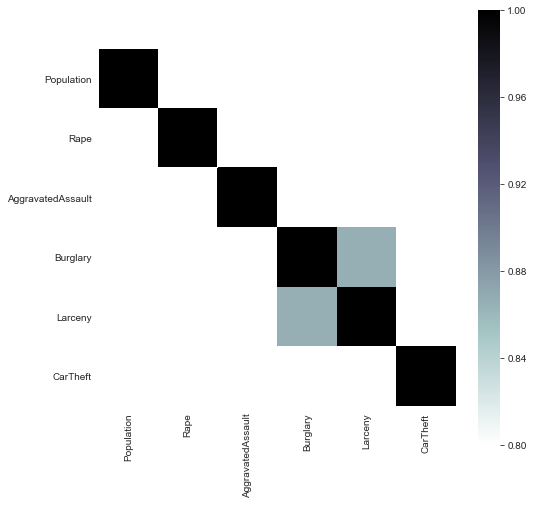

In [32]:
plt.rcParams['figure.figsize'] = 8, 8

sns.heatmap(X.corr(), vmin=.8, vmax=1, square=True, cmap='bone_r')

In [33]:
logreg = LogisticRegression(C=1e9)

lrfit = logreg.fit(X, Y)

print(lrfit.coef_)
print(lrfit.intercept_)

logconfuse = pd.crosstab(logreg.predict(X), Y)

print(logconfuse)
logcvscore = cross_val_score(logreg, X, Y, cv=10)
print('Cross-Validation Scores:\n', logcvscore)
print('R-squared mean:\n', logcvscore.mean())
print('Standard Deviation * 2:\n', logcvscore.std()*2)

[[-0.10942152  0.17029293  0.09794311  0.0168202   1.69085907  0.53621053]]
[-6.63936784]
Robbery    0    1
row_0            
0        109   25
1         28  107
Cross-Validation Scores:
 [ 0.78571429  0.82142857  0.81481481  0.77777778  0.74074074  0.74074074
  0.77777778  0.88461538  0.84615385  0.76923077]
R-squared mean:
 0.795899470899
Standard Deviation * 2:
 0.0870913565918


# Preliminary Ridge Logistic Regression

In [34]:
ridgereg = LogisticRegression(penalty='l2', C=1)

ridgefit = ridgereg.fit(X, Y)

print(ridgefit.coef_)
print(ridgefit.intercept_)

ridgeconfuse = pd.crosstab(ridgereg.predict(X), Y)

print(ridgeconfuse)
ridgecvscore = cross_val_score(ridgereg, X, Y, cv=10)
print('Cross-Validation Scores:\n', ridgecvscore)
print('R-squared mean:\n', ridgecvscore.mean())
print('Standard Deviation * 2:\n', ridgecvscore.std()*2)

[[-0.72127719  0.27707473  0.13952138  0.26634459  1.46433623  0.6003196 ]]
[-1.23364282]
Robbery    0    1
row_0            
0        112   26
1         25  106
Cross-Validation Scores:
 [ 0.75        0.78571429  0.81481481  0.74074074  0.74074074  0.77777778
  0.77777778  0.84615385  0.80769231  0.65384615]
R-squared mean:
 0.769525844526
Standard Deviation * 2:
 0.100395395605


# Preliminary LASSO Logistic Regression

In [35]:
lassoreg = LogisticRegression(penalty='l1', C=1)

lassofit = lassoreg.fit(X, Y)

print(lassofit.coef_)
print(lassofit.intercept_)

lassoconfuse = pd.crosstab(lassoreg.predict(X), Y)

print(lassoconfuse)
lassocvscore = cross_val_score(lassoreg, X, Y, cv=10)
print('Cross-Validation Scores:\n', lassocvscore)
print('R-squared mean:\n', lassocvscore.mean())
print('Standard Deviation * 2:\n', lassocvscore.std()*2)

[[-0.55251037  0.14277981  0.11921594  0.16164701  1.56493991  0.5470618 ]]
[-2.71954139]
Robbery    0    1
row_0            
0        109   22
1         28  110
Cross-Validation Scores:
 [ 0.75        0.85714286  0.81481481  0.77777778  0.77777778  0.77777778
  0.81481481  0.88461538  0.80769231  0.65384615]
R-squared mean:
 0.791625966626
Standard Deviation * 2:
 0.119271760928


## Initial Comparison

In [36]:
print('Logistic Regression:')
print(logconfuse)
print(logcvscore.mean())
print('Ridge Logistic Regression:')
print(ridgeconfuse)
print(ridgecvscore.mean())
print('LASSO Logistic Regression:')
print(lassoconfuse)
print(lassocvscore.mean())

Logistic Regression:
Robbery    0    1
row_0            
0        109   25
1         28  107
0.795899470899
Ridge Logistic Regression:
Robbery    0    1
row_0            
0        112   26
1         25  106
0.769525844526
LASSO Logistic Regression:
Robbery    0    1
row_0            
0        109   22
1         28  110
0.791625966626


In the first pass, ridge regression yielded the highest R-squared value, along with the most true negatives, but also yielded the fewest true positives.

In [37]:
features2['Theft'] = features['Larceny'] * features['Burglary']

(array([ 44.,  36.,  43.,  39.,  40.,  27.,  15.,  14.,   8.,   3.]),
 array([  0.        ,   3.17093512,   6.34187024,   9.51280537,
         12.68374049,  15.85467561,  19.02561073,  22.19654585,
         25.36748097,  28.5384161 ,  31.70935122]),
 <a list of 10 Patch objects>)

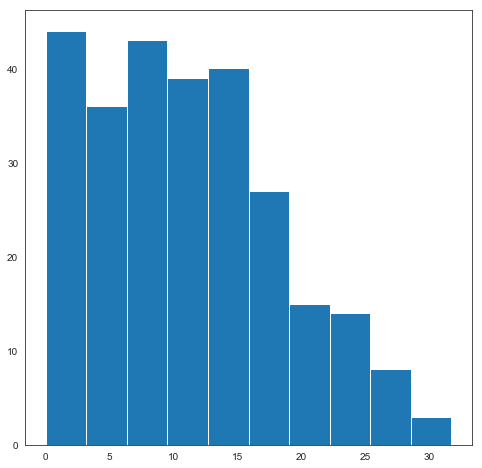

In [38]:
plt.hist(features2['Theft'])

# Ridge Alpha Selection

In [39]:
ridgescores = []

for alphavalue in np.arange(0.01, 10, 0.01):
    ridgereg = LogisticRegression(penalty='l2', C=alphavalue)

    ridgefit = ridgereg.fit(X, Y)

    ridgescores.append(cross_val_score(ridgereg, X, Y, cv=10).mean())

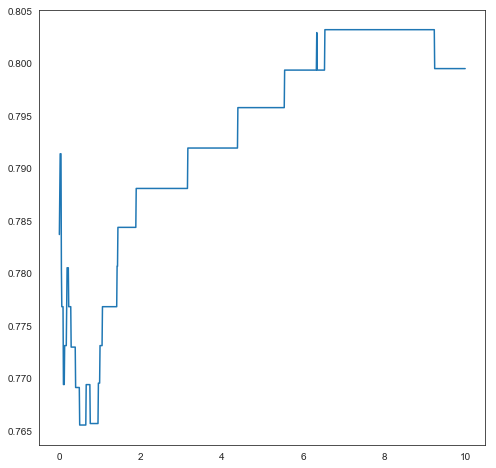

In [40]:
plt.plot(np.arange(0.01, 10, 0.01), ridgescores)
plt.show()

There is a clear plateau at "8" and surrounding values, so we will use 8 for the alpha/lambda value.

# Lasso Alpha Selection:

In [41]:
lassoscores = []

for alphavalue in np.arange(0.001, 2, 0.001):
    lassoreg = LogisticRegression(penalty='l1', C=alphavalue)

    lassofit = lassoreg.fit(X, Y)

    lassoscores.append(cross_val_score(lassoreg, X, Y, cv=5).mean())

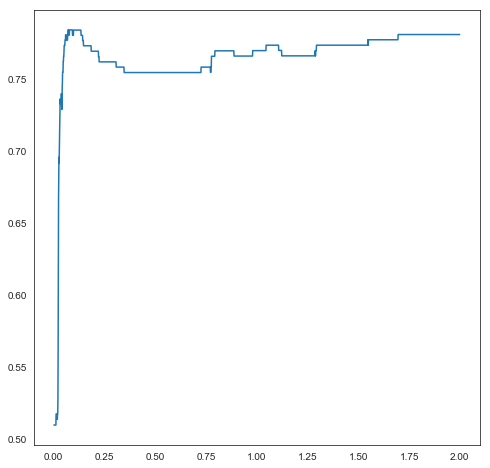

In [42]:
plt.plot(np.arange(0.001, 2, 0.001), lassoscores)
plt.show()

In [43]:
lassoframe = pd.DataFrame(lassoscores)

In [44]:
lassoframe

,0
0,0.509297
1,0.509297
2,0.509297
3,0.509297
4,0.509297
5,0.509297
6,0.509297
7,0.509297
8,0.509297
9,0.509297


In [45]:
lassoscores

[0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.50929674099485422,
 0.51698113207547169,
 0.51698113207547169,
 0.51698113207547169,
 0.51698113207547169,
 0.51698113207547169,
 0.51698113207547169,
 0.51334476843910815,
 0.51698113207547169,
 0.51698113207547169,
 0.52830188679245282,
 0.56157804459691252,
 0.61708404802744421,
 0.66545454545454541,
 0.68027444253859348,
 0.69536878216123499,
 0.6914579759862779,
 0.7026415094339622,
 0.71005145797598623,
 0.71759862778730699,
 0.72850771869639797,
 0.735917667238422,
 0.73228130360205834,
 0.73228130360205834,
 0.73228130360205834,
 0.73605488850771872,
 0.73228130360205834,
 0.73955403087478566,
 0.73214408233276163,
 0.72850771869639797,
 0.73228130360205834,
 0.74332761578044604,
 0.74710120068610641,
 0.75451114922813045,
 0.75451114922813045,
 0.75451114922

In [46]:
lassoscores.sort()

In [47]:
lassoscores[-1]

0.78401372212692977

In [48]:
lassoframe[lassoframe[0] == 0.78401372212692977]

,0
71,0.784014


The index is 71, which means that to achieve the maximum R-squared value, our alpha/lambda value should be 0.072 (Index 0 is 0.01).

# Finalized Ridge Logistic Regression

In [49]:
ridgereg = LogisticRegression(penalty='l2', C=8)

ridgefit = ridgereg.fit(X, Y)

print(ridgefit.coef_)
print(ridgefit.intercept_)

ridgeconfuse = pd.crosstab(ridgereg.predict(X), Y)

print(ridgeconfuse)
ridgecvscore = cross_val_score(ridgereg, X, Y, cv=10)
print('Cross-Validation Scores:\n', ridgecvscore)
print('R-squared mean:\n', ridgecvscore.mean())
print('Standard Deviation * 2:\n', ridgecvscore.std()*2)

[[-0.41475717  0.22032534  0.11175559  0.11866171  1.62764248  0.57236474]]
[-4.08394007]
Robbery    0    1
row_0            
0        111   23
1         26  109
Cross-Validation Scores:
 [ 0.78571429  0.82142857  0.81481481  0.77777778  0.77777778  0.77777778
  0.81481481  0.88461538  0.84615385  0.73076923]
R-squared mean:
 0.803164428164
Standard Deviation * 2:
 0.0814037061668


# Finalized LASSO Logistic Regression

In [50]:
lassoreg = LogisticRegression(penalty='l1', C=.072)

lassofit = lassoreg.fit(X, Y)

print(lassofit.coef_)
print(lassofit.intercept_)

lassoconfuse = pd.crosstab(lassoreg.predict(X), Y)

print(lassoconfuse)
lassocvscore = cross_val_score(lassoreg, X, Y, cv=10)
print('Cross-Validation Scores:\n', lassocvscore)
print('R-squared mean:\n', lassocvscore.mean())
print('Standard Deviation * 2:\n', lassocvscore.std()*2)

[[-0.52804134  0.          0.07800112  0.2435427   0.91492523  0.17205448]]
[ 0.]
Robbery    0    1
row_0            
0        101   23
1         36  109
Cross-Validation Scores:
 [ 0.82142857  0.85714286  0.74074074  0.74074074  0.74074074  0.74074074
  0.81481481  0.80769231  0.76923077  0.69230769]
R-squared mean:
 0.772557997558
Standard Deviation * 2:
 0.0960489939173


# Comparison:

Let's now compare these optimized results with "vanilla" logistic regression:

In [51]:
print('Logistic Regression:')
print(logconfuse)
print(logcvscore.mean())
print('Ridge Logistic Regression:')
print(ridgeconfuse)
print(ridgecvscore.mean())
print('LASSO Logistic Regression:')
print(lassoconfuse)
print(lassocvscore.mean())

Logistic Regression:
Robbery    0    1
row_0            
0        109   25
1         28  107
0.795899470899
Ridge Logistic Regression:
Robbery    0    1
row_0            
0        111   23
1         26  109
0.803164428164
LASSO Logistic Regression:
Robbery    0    1
row_0            
0        101   23
1         36  109
0.772557997558


Compared with the earlier results, Ridge regression actually does marginally better than vanilla Logistic regression when the lambda/alpha value is optimized. LASSO's performance looks to have diminished.